In [5]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

In [6]:
import matplotlib.pyplot as plt

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


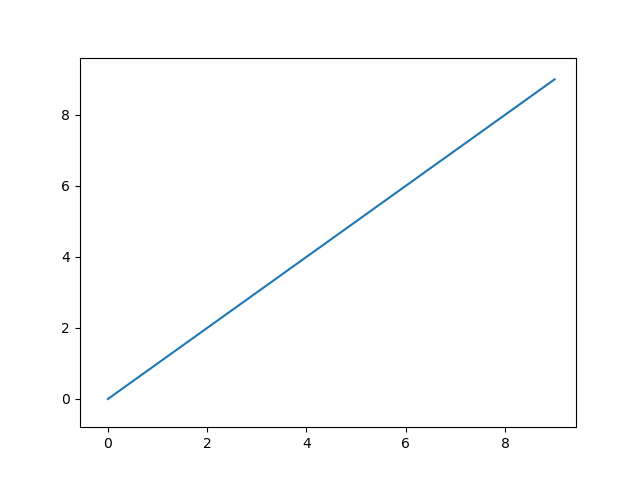

In [6]:
plt.plot(data)

<IPython.core.display.Javascript object>


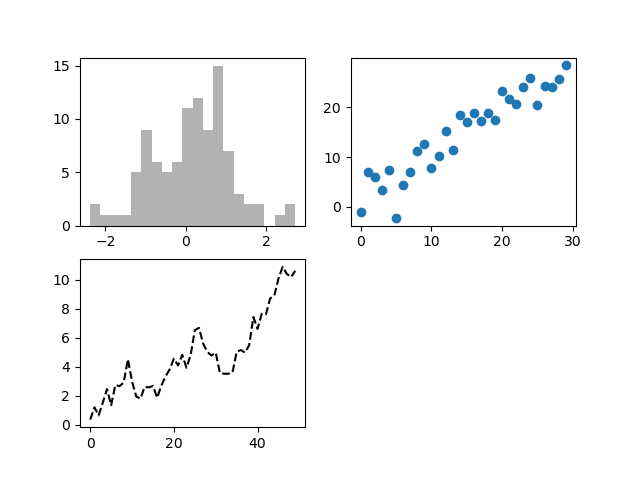

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [10]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


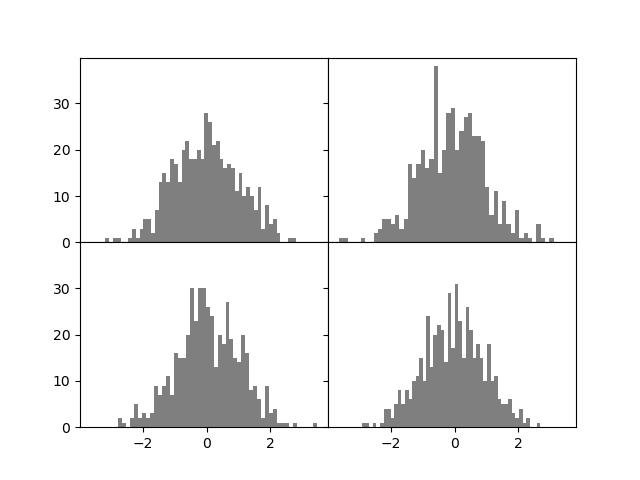

In [32]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [15]:
plt.plot?

<IPython.core.display.Javascript object>


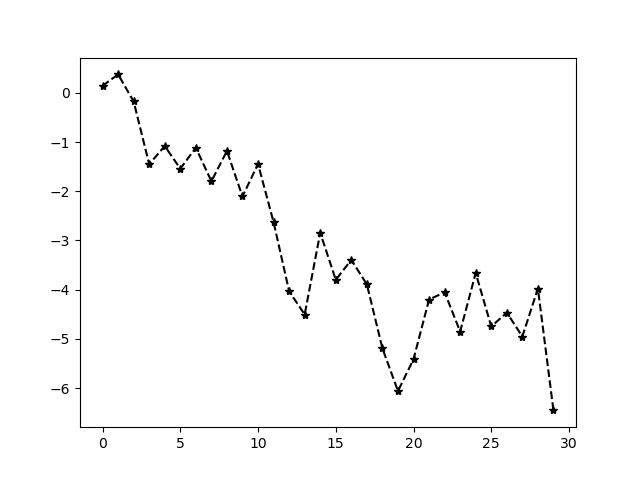

In [30]:
new = plt.figure()

In [31]:
plt.plot(np.random.randn(30).cumsum(), 'k*--')

In [24]:
data = np.random.randn(30).cumsum()

In [39]:
plt.plot(data, 'k--', label='Default')

<IPython.core.display.Javascript object>


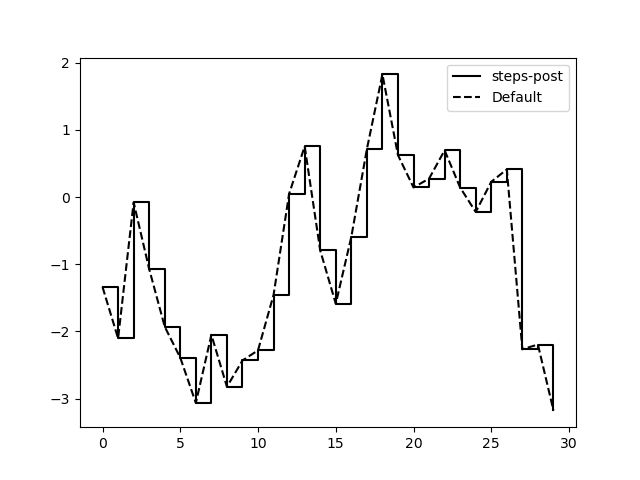

In [38]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [40]:
plt.legend(loc='best')

<IPython.core.display.Javascript object>


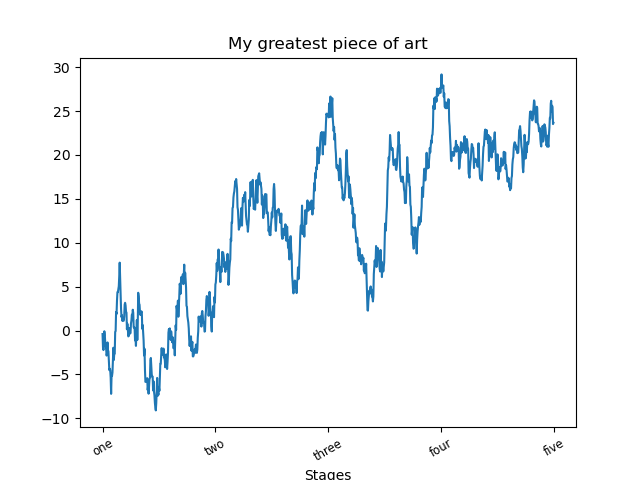

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [43]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My greatest piece of art')
ax.set_xlabel('Stages')

Text(0.5, 23.52222222222222, 'Stages')

<IPython.core.display.Javascript object>


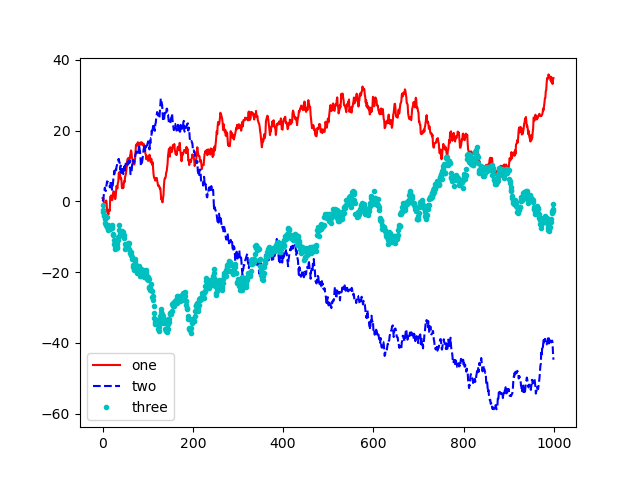

In [45]:
from numpy.random import randn as rn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(rn(1000).cumsum(), 'r', label='one')
ax.plot(rn(1000).cumsum(), 'b--', label='two')
ax.plot(rn(1000).cumsum(), 'c.', label='three')
ax.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008 - 2009 financial crisis')

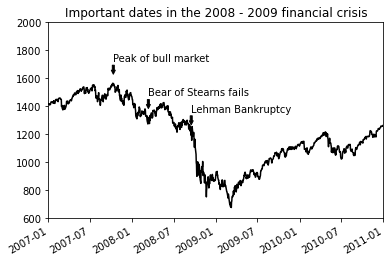

In [7]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv',
                  index_col=0,
                  parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear of Stearns fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,
                              width=2, headlength=4),
               horizontalalignment='left',
               verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 2000])

ax.set_title('Important dates in the 2008 - 2009 financial crisis')

In [50]:
fig.savefig('fin_crisis.png', dpi=400, bbox_inches='tight')

<h2>9.2 Plotting with pandas and seaborn

<IPython.core.display.Javascript object>


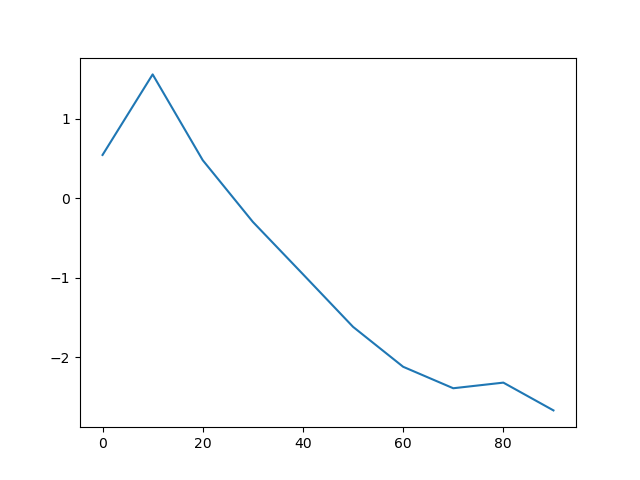

In [51]:
s = pd.Series(rn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


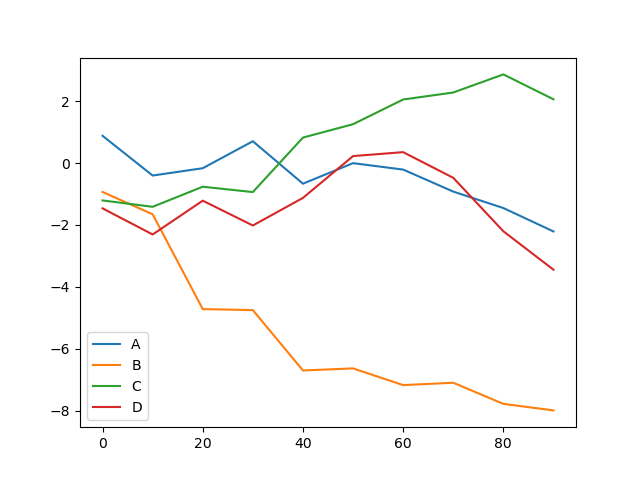

In [53]:
df = pd.DataFrame(rn(10, 4).cumsum(0),
                  columns=list('ABCD'),
                  index=np.arange(0, 100, 10))
df.plot()

<IPython.core.display.Javascript object>


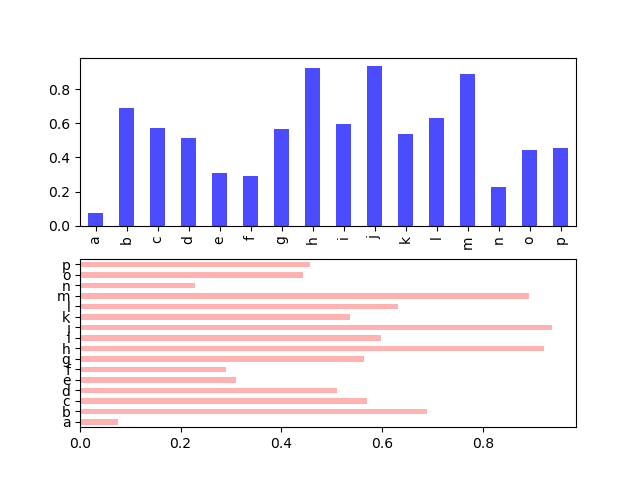

In [54]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), 
                index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b', alpha=0.7)
data.plot.barh(ax=axes[1], color='r', alpha=0.3)

In [55]:
df = pd.DataFrame(np.random.rand(6,4),
                 index='one two three four five six'.split(),
                 columns=pd.Index(list('ABCD'), name='Genus'))

In [56]:
df

Genus,A,B,C,D
one,0.817000,0.128191,0.665345,0.781175
two,0.652659,0.188272,0.957268,0.637977
three,0.101031,0.205034,0.983452,0.413161
four,0.271289,0.122841,0.814572,0.253378
five,0.234070,0.523240,0.006857,0.252614
six,0.979940,0.584153,0.380938,0.313874


<IPython.core.display.Javascript object>


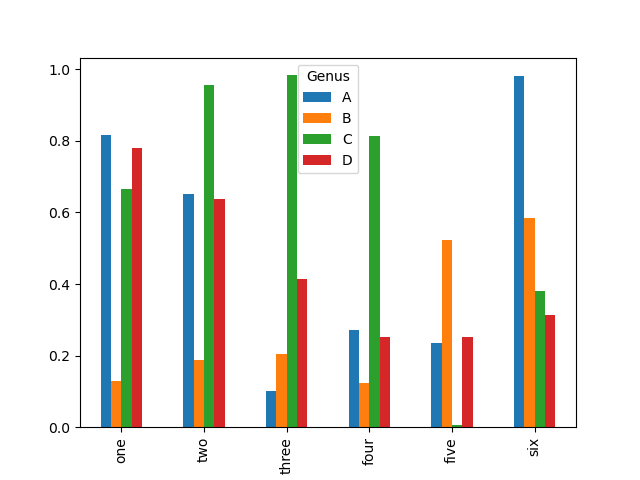

In [57]:
df.plot.bar()

<IPython.core.display.Javascript object>


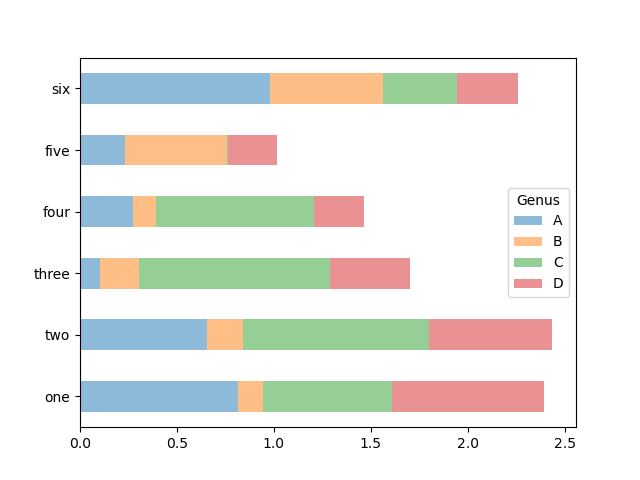

In [58]:
df.plot.barh(stacked=True, alpha=0.5)

In [8]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])

In [60]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [62]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

<IPython.core.display.Javascript object>


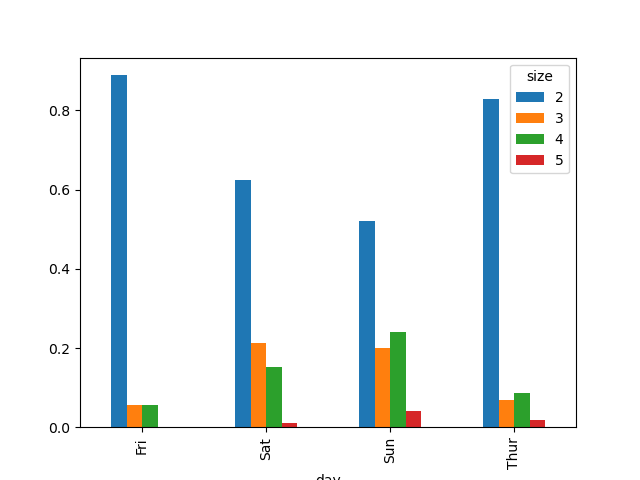

In [63]:
party_pcts.plot.bar()

In [9]:
import seaborn as sns

In [13]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [11]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip-pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


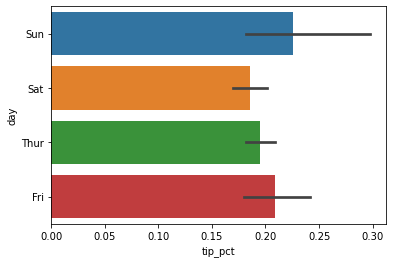

In [14]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

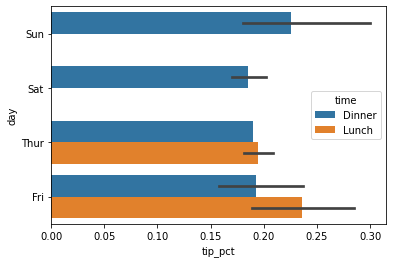

In [15]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

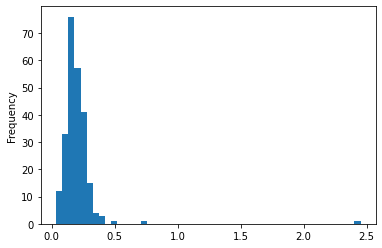

In [16]:
tips['tip_pct'].plot.hist(bins=50)

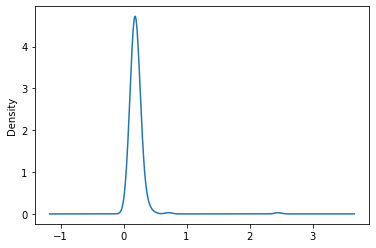

In [17]:
tips['tip_pct'].plot.density()

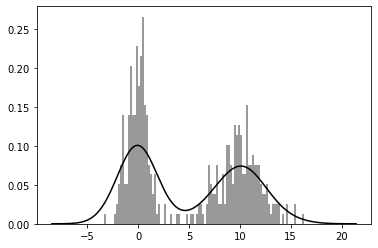

In [18]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [19]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

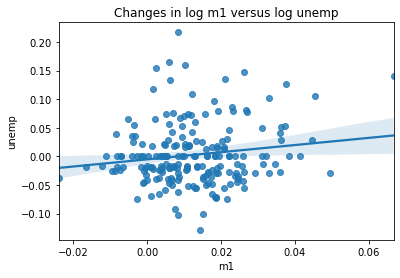

In [20]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

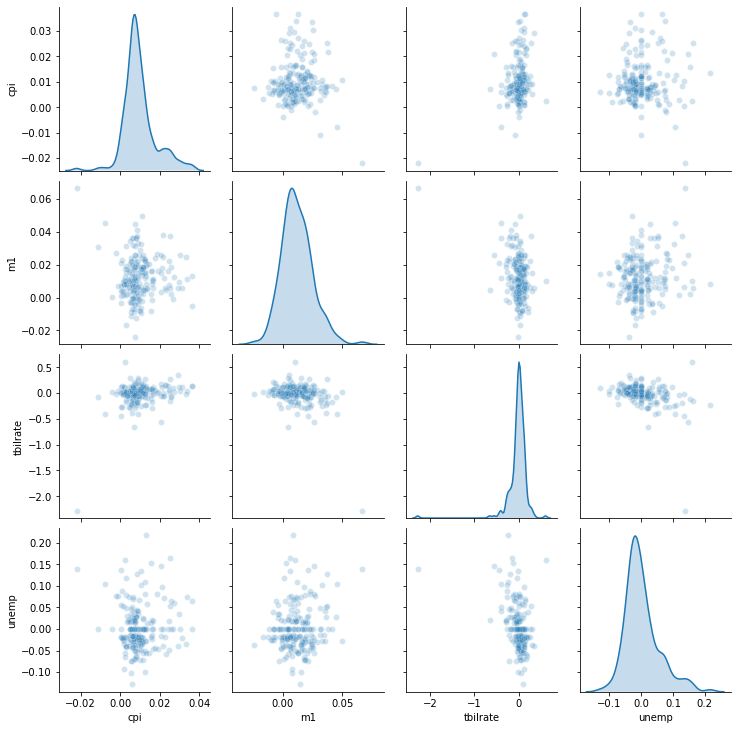

In [21]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

C:\Users\tedbr\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


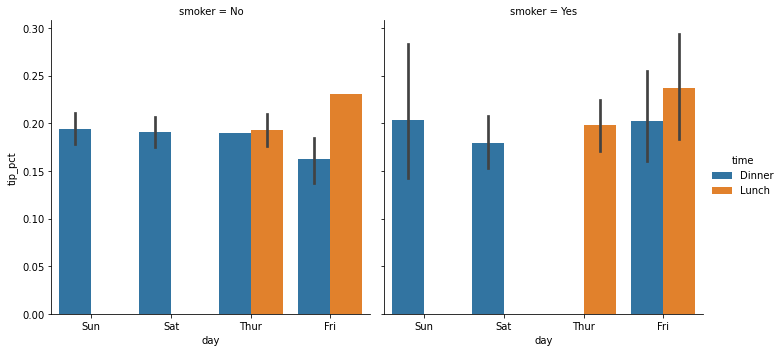

In [22]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', 
              kind='bar', data=tips[tips.tip_pct < 1])

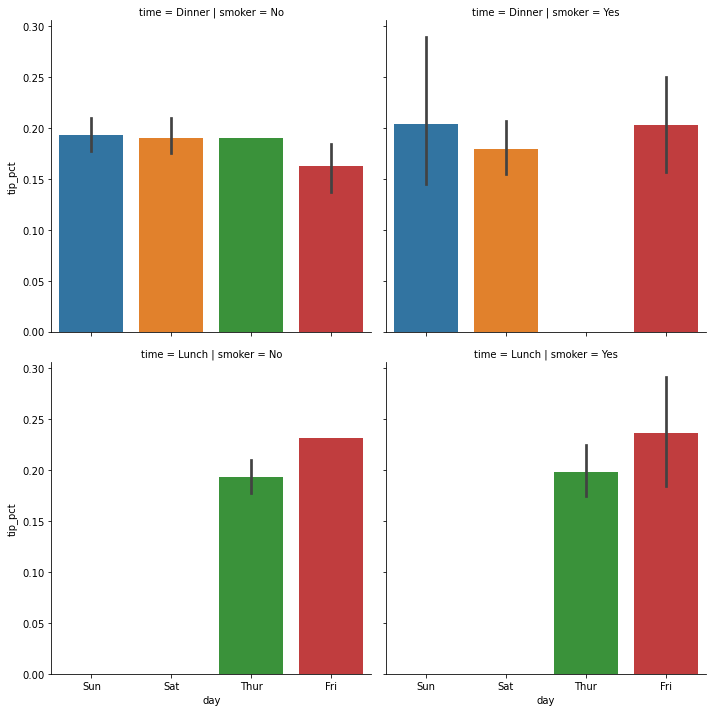

In [23]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', 
              kind='bar', data=tips[tips.tip_pct < 1])

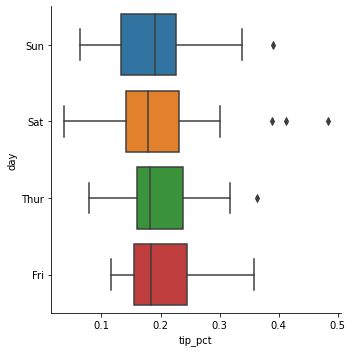

In [24]:
sns.catplot(x='tip_pct', y='day',  
              kind='box', data=tips[tips.tip_pct < 0.5])